# Quantum Computing Key Concepts 
- <font color="red">For the Software Engineer</font>

![qc-banner](img/qc-banner1.png "qc-banner")

## Pedagogical Approach: (<font color="red">**Read this first !**</font>)

This material is intended to educate **software engineers** in certain aspects of Quantum Computing, therefore its focus will be on conveying the conceptual ideas in a form digestible to them, and supporting it with exercises to reinforce those concepts. 

Because of that pedagogical approach, **this material won't lead with or heavily leverage the concepts and language indigenous to physics and math**, but only in those terms most easily digestible to the modern software engineer.

This Jupyter Notebook is <font color="red">**not intended as a stand alone educational vehicle**</font>  - it's meant to be accompanied by a decicated power point deck that contains the main concepts to be presented by an instructor - **it is intended as a vehicle for a hands on workshop environment to facilitate learning through a guided experience.**

> **Note:-** Because of the above educational approach:
1. There is a certain amount of basic Quantum Computing knowledge that is assumed.
2. An active internet connection is **always** assumed.
3. Online references/links will be provided where appropriate
4. References to books will be made where appropriate
5. Much of this material is **dense and detailed**, the reader is <font color="red">**cautioned**</font> to be careful and slow to digest the *nuances* of the material.

## What you will be exposed to - High level: 


- Software engineers in the Quantum Computing space need to know their way around important concepts in this space - that means developing intuition and proficiencies around: quantum waves, interference, superposition, entanglement and teleportation. 
- Given the above, there are a host of technical concepts that need to be **<font color="red">understood experientially</font>**, therefore we'll intentionally employ a vendor / framework agnostic approach to focus on the delivery of concept understanding and intuition procurement as the main value-add.

> ### High Level Agenda (<font color="red">*major sections*</font>): - key concepts for the quantum software engineer.
1. Quantum <font color="blue">*Waves*</font>
2. Quantum <font color="blue">*Interference*</font>
3. Quantum <font color="blue">*Superposition*</font>
4. Quantum <font color="blue">*Entanglement*</font>
5. Quantum <font color="blue">*Teleportation*</font>



# Developmental Detour : -  <font color="blue">Quantum Waves</font>

<BR>

![wavefunction](img/wavefunction.png "wavefunction")

In [4]:
from IPython.display import IFrame
IFrame(src='https://phet.colorado.edu/sims/html/waves-intro/latest/waves-intro_en.html', width=900, height=900)

# Developmental Detour : -  <font color="blue">Quantum Interference</font>

<BR>
    
    
![interference-fisherman](img/interference-fishermen.png "interference-fisherman")

<BR>

<table><tr><td><img src='img/wave-interference.png'></td></tr></table>


> A fundamental idea in quantum computing is to **control** the probability a system of qubits collapses into particular measurement states. **Quantum interference**, a byproduct of superposition, is what allows us to **bias** the measurement of a qubit **toward a desired state or set of states**.

In [159]:
from IPython.display import IFrame
IFrame(src='https://phet.colorado.edu/sims/html/wave-interference/latest/wave-interference_en.html', width=900, height=900)

# Developmental Detour : -  <font color="blue">Quantum Superposition</font>

<BR>
    
![superposition](img/superposition.png "superposition")

<BR>
    
> **SUPERPOSITION:** -The qubit is a unit of quantum information. As a **two-state system with superposition of both states at the <font color="red">same</font> time**, it is fundamental to quantum computing. 

    
> **<font color="red">Note:</font>** 
- **One **<font color="blue">Bit</font>**** can represent **two** different values, **“0”** and **“1”**.
- **One **<font color="blue">Qubit</font>**, unlike a bit, can take on an **<font color="red">infinite</font>** number of values. Physicists call these the **<font color="red">states</font>** of the qubit.

## <font color="red">Exercise:</font> Creating a Perfectly Random Quantum Bit : Qubit

![One Random Bit](img/random_bit.png "One Random Bit")


### Using the **<font color="blue">QCEngine</font>** to Explore a "Perfectly Random Quantum Bit".

In [28]:
from IPython.display import IFrame
IFrame(src='http://oreilly-qc.github.io?p=2-1', width=900, height=900)

### Using **<font color="blue">QUIRK</font>** to Explore a "Perfectly Random Quantum Bit".

In [65]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22],[%22%E2%80%A6%22],[%22~87lj%22],[%22Bloch%22],[%22Density%22],[%22%E2%80%A6%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=900, height=600)

### Using **<font color="blue">Qiskit</font>** to Explore a "Perfectly Random Quantum Bit".



counts: {'1': 1}
Output State:  [0.+0.j 1.+0.j]
Display State 1.0  |0>   


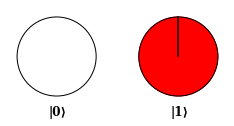

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from Our_Qiskit_Functions import *
import cmath


## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))


## Example 2-1: Random bit
# Set up the program
reg = QuantumRegister(1, name='reg')
reg_c = ClassicalRegister(1, name='regc')
qc = QuantumCircuit(reg, reg_c)

qc.reset(reg)          # write the value 0
qc.h(reg)              # put it into a superposition of 0 and 1
qc.measure(reg, reg_c) # read the result as a digital bit

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

counts = result.get_counts(qc)
print('counts:',counts)

outputstate = result.get_statevector(qc, decimals=3)
print("Output State: ", outputstate)
print("Display State", Wavefunction(qc))


qc.draw(output='mpl')        # draw the circuit

# Print out Circle Notation

from circle_plot import *
plot_circles(outputstate)


The original complex number Re{0}, Im{0}, and Length : 0.000000
Phase:  0.0
The original complex number Re{1}, Im{0}, and Length : 1.000000
Phase:  0.0


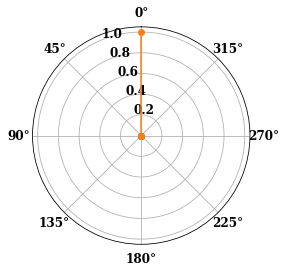

In [2]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve  
# Plot both vectors and phase / angle (if non-zero)

P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(outputstate)

## <font color="red">Exercise:</font> Creating a Perfectly Random Quantum Byte : QuByte

![One Random Byte](img/random_byte.png "One Random Byte")


> **<font color="red">Note:</font>** The largest number you can represent with **8 bits** is 11111111, or **255** in decimal notation. Since 00000000 is the smallest, **you can represent **<font color="red">256</font>** things with a byte**.

    
> **<font color="red">Reminder:</font>** 
- **One **<font color="blue">Qubit</font>**, unlike a bit, can take on an **<font color="red">infinite</font>** number of values. Physicists call these the **<font color="red">states</font>** of the qubit.


- These Qubits are **<font color="red">not</font>** entangled.

### <font color="blue">Discussion:</font>:
The true power of quantum computing only becomes evident as we **increase the number of qubits**. This power arises, in part, because the **dimension** of the vector space of quantum state vectors **grows exponentially** with the number of qubits.

**Every time we add a qubit to a quantum system the state space <font color="blue">doubles</font> in dimension** - this is because we multiply the dimension of the original system’s state space by 2 when the new qubit is added. A **3-qubit** quantum system has a state space of **dimension of eight (8)**. An **n-qubit** system’s state space has **2^n dimensions**.


### Using **<font color="blue">QCEngine</font>** to Explore a "Perfectly Random Quantum Byte".

In [66]:
from IPython.display import IFrame
IFrame(src='http://oreilly-qc.github.io?p=2-2', width=900, height=900)

> **<font color="red">Reminder:</font>** 
- **One **<font color="blue">Qubit</font>****, unlike a bit, can take on an **<font color="red">infinite</font>** number of values. Physicists call these the **<font color="red">states</font>** of the qubit.


- These Qubits of the below circuit are **<font color="red">not</font>** entangled.

### Using **<font color="blue">QUIRK</font>** to Explore a "Perfectly Random Quantum Byte".


In [67]:
# QUIRK (Quantum Curcuit Simulator) of the Random QuByte
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22,%22H%22,%22H%22,%22H%22,%22H%22,%22H%22,%22H%22,%22H%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22],[%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22],[%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22],[%22Density%22,%22Density%22,%22Density%22,%22Density%22,%22Density%22,%22Density%22,%22Density%22,%22Density%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=900, height=900)

### Using **<font color="blue">Qiskit</font>** to Explore a "Perfectly Random Quantum Byte".

Binary Number:  01011100
Random number: 92


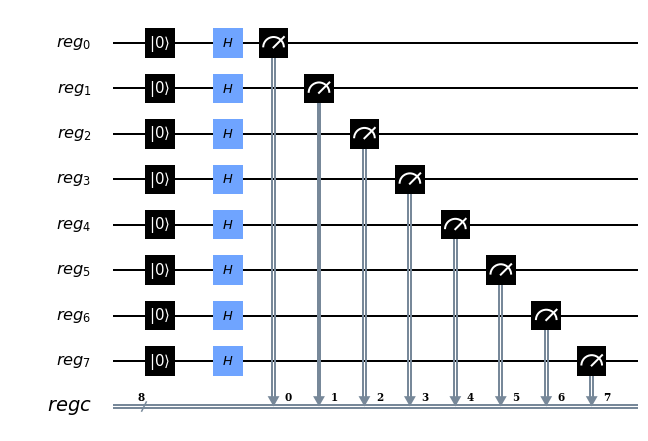

In [63]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from Our_Qiskit_Functions import *
import cmath


## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))
            
            

## Example 2-2: Random byte
# Set up the program
reg = QuantumRegister(8, name='reg')
reg_c = ClassicalRegister(8, name='regc')
qc = QuantumCircuit(reg, reg_c)

qc.reset(reg)          # write the value 0
qc.h(reg)              # put it into a superposition of 0 and 1
qc.measure(reg, reg_c) # read the result as a digital bit

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)


# Convert the result into a random number
counts = result.get_counts(qc)
# print('Binary Number and count:',counts)

for k in counts:
    binary_number = ''.join(reversed(k))
    print("Binary Number: ", binary_number)
    
for key,val in counts.items():
    n = sum([(int(x) << i) for i,x in enumerate(key)])
    print('Random number:', n)

qc.draw(output='mpl')        # draw the circuit


# Developmental Detour : -  <font color="blue">Quantum Entanglement</font>

<BR>
    

![Quantum Entanglement](img/entanglement.png "Quantum Entanglement")

> **<font color="red">Note:</font>** Entanglement gives Qunatum Computing the ability to scale **exponentially** - and along with superposition and interference, is a **key differentiator** in quantum computing.

- If one qubit simultaneously represents two states, two qubits represents four states when coupled together (entangled). **They can no longer be treated independently**, they now form a coupled (or entangled) super state.


- As more qubits link together, the number of states **exponentially increases** - which leads to *astronomically large computing power*.

### Using **<font color="blue">QUIRK</font>** to explore **<font color="red">two</font>** entangled qubits


### Move the "message gate" up and down each qubit wire 
- **<font color="red">Observe</font>** how the activity propagates through out the entirety of the entangled circuit
- **<font color="red">Notice</font>** the Bloch spheres have "given up" because the qubits are entangled and can no longer **describe their states independently** - Instead look at the amplitude display to see the state of the full system. 
- **Move** the message gate to both qubits and **observe** that changes to one affect the other (*as they are entangled*).

In [3]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22],[%22%E2%80%A2%22,%22X%22],[%22~87lj%22],[%22Bloch%22,%22Bloch%22],[%22Chance2%22],[%22Density2%22],[],[%22Measure%22,%22Measure%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=900, height=600)

### Using **<font color="blue">QUIRK</font>** to explore **<font color="red">multiple</font>** entangled qubits
- **<font color="red">Observe</font>** how the activity propagates through out the entirety of the entangled circuit
- **<font color="red">Notice</font>** the Bloch spheres have "given up" because the qubits are entangled and can no longer **describe their states independently** - Instead look at the amplitude display to see the state of the full system. 

In [165]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22],[%22%E2%80%A2%22,%22X%22],[1,%22%E2%80%A2%22,%22X%22],[1,1,%22%E2%80%A2%22,%22X%22],[%22~87lj%22],[%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22],[%22Chance4%22],[%22Density4%22],[],[],[],[%22Measure%22,%22Measure%22,%22Measure%22,%22Measure%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=900, height=700)

### Using **<font color="blue">QCEngine</font>** to explore **<font color="red">two</font>** Entangled Qubits

> **NOTICE** - what happens to one qubit happens to the "entangled" qubit(s) as well.
- Run and re-run the program and observe the different results.

<BR><BR>

![Quantum Entanglement Circuit](img/bells_pair.png "Quantum Entanglement Circuit")

In [13]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='http://oreilly-qc.github.io?p=3-2', width=900, height=600)

### Using **<font color="blue">Qiskit</font>** to explore **<font color="red">two</font>** Entangled Qubits

> **NOTICE** - what happens to one qubit happens to the "entangled" qubit(s) as well - the outputs counts are either (0:0) or (1:1).
- Run and re-run the program and observe the different results.

In [155]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from Our_Qiskit_Functions import *
import cmath


## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    print("Normalized Result: ")
    for result in state_vector:
        print(round( np.abs(result)**2, 1) )
                    
            
## Example 3-2: Entangled Qubits
# Set up the program
a = QuantumRegister(1, name='a')
b = QuantumRegister(1, name='b')

a_c = ClassicalRegister(1, name='ac')
b_c = ClassicalRegister(1, name='bc')

qc = QuantumCircuit(a, b, a_c, b_c)


qc.h(a)            # put a into a superposition of 0 and 1
qc.cx(a, b)        # entangle a and b

qc.measure(a, a_c)
qc.measure(b, b_c)


backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()


counts = result.get_counts(qc)
print('counts:',counts)


counts: {'0 0': 1}


Output State:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j] 

Normalized Result: 
1.0
0.0
0.0
0.0


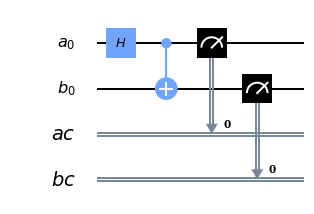

In [156]:
outputstate = result.get_statevector(qc, decimals=3)
print("Output State: ", outputstate, "\n")
normalize_state_Vector(outputstate)
qc.draw(output='mpl')        # draw the circuit

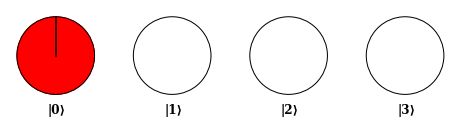

In [157]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(outputstate)

# Developmental Detour : -  <font color="blue">Quantum Teleportation</font>

<BR><BR>
    
![teleportation-bell-jars](img/teleportation-bell-jars.png "teleportation-bell-jars")

> **<font color="red">Notice</font>** Quantum Teleportation is a **fundamental primitive** in **quantum networking**, and in executing certain types of quantum computing.

## Quantum Teleportation Basics


![teleportation-cartoon](img/teleportation-cartoon.png "teleportation-cartoon")

<BR><BR>

![teleportation-diagram](img/teleportation-diagram.png "teleportation-diagram")
   
   
> In quantum circuit language, the way to create a Bell pair between two qubits is to first transfer one of them to the **Bell basis**  **(<font color="red"> |+⟩ </font> and <font color="red"> |−⟩ </font>)**  by using a **Hadamard** gate, and then to apply a **CNOT** gate onto the other qubit *controlled* by the one in the Bell basis.

### Using **<font color="blue">QCEngine</font>** to Explore Quantum Teleportation

> **NOTICE** - After understanding the basics of Quantum Teleportation, observe how that gets implemented in the circuit.
- Run the program and observe the different results and step through the circuit to inspect the different stages of the teleportation operation.

![Basic Teleportation](img/basic_teleportation-1.png "Basic Teleportation")

In [12]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='http://oreilly-qc.github.io?p=4-1', width=900, height=600)

### Using **<font color="blue">QUIRK</font>** to Explore Quantum Teleportation

> **NOTICE** - The "message" gate provides insight into how the teleporting of the state of the qubit occures - follow it through the circuit.


In [11]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[1,%22H%22],[1,%22%E2%80%A2%22,1,1,%22X%22],[%22%E2%80%A6%22,%22%E2%80%A6%22],[%22~87lj%22],[%22Bloch%22],[%22%E2%80%A2%22,%22X%22],[%22H%22],[%22Measure%22,%22Measure%22],[%22Bloch%22,%22Bloch%22],[1,%22%E2%80%A2%22,1,1,%22X%22],[%22%E2%80%A2%22,1,1,1,%22Z%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=900, height=600)

### Using **<font color="blue">QISKIT</font>** to Explore Quantum Teleportation

> **NOTICE** - Compare this circuit to the corresponding QCEngine circuit and follow the architecture, execution, and resulting curcuit.


In [148]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math

## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline

# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    print("Normalized Result: ")
    for result in state_vector:
        print(round( np.abs(result)**2, 1) )
           
            
## Example 4-1: Basic Teleportation

# Set up the program

# Quantum Registers
alice = QuantumRegister(1, name='alice')
ep    = QuantumRegister(1, name='ep')
bob   = QuantumRegister(1, name='bob')

# Classical Registers
alice_c = ClassicalRegister(1, name='alicec')
ep_c    = ClassicalRegister(1, name='epc')
bob_c   = ClassicalRegister(1, name='bobc')

# Quantum Circuit
qc = QuantumCircuit(alice, ep, bob, alice_c, ep_c, bob_c)


# entangle the key qubits in the circuit
#
qc.h(ep)
qc.cx(ep, bob)
qc.barrier()


# prep payload
qc.reset(alice)
qc.h(alice)
qc.rz(math.radians(45), alice)
qc.h(alice)
qc.barrier()


# send the state of Allices Qubit
# 
qc.cx(alice, ep)
qc.h(alice)
qc.measure(alice, alice_c)
qc.measure(ep, ep_c)
qc.barrier()


# Bob receives Alices Qubits State
#
qc.x(bob).c_if(ep_c, 1)
qc.z(bob).c_if(alice_c, 1)


# verify the receipt of the state
#
qc.h(bob)
qc.rz(math.radians(-45), bob)
qc.h(bob)
qc.measure(bob, bob_c)


## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()


counts = result.get_counts(qc)
print('counts:',counts)

counts: {'0 1 1': 1}


Output State:  [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j] 

Normalized Result: 
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


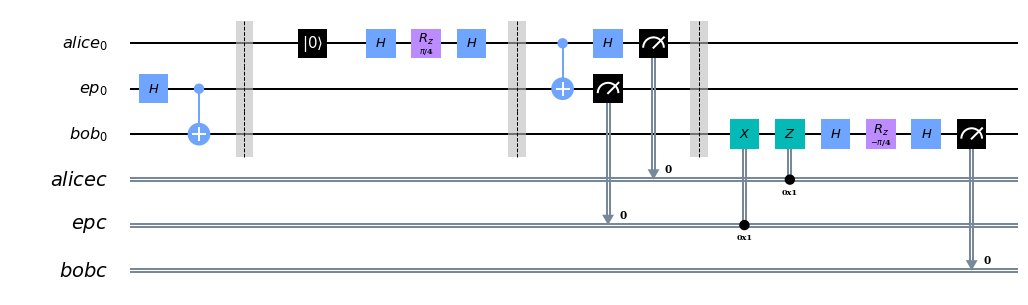

In [149]:
outputstate = result.get_statevector(qc, decimals=3)
print("Output State: ", outputstate, "\n")
normalize_state_Vector(outputstate)
qc.draw(output='mpl')        # draw the circuit

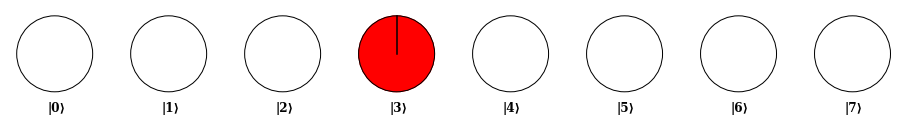

In [150]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(outputstate)

![the-end](img/the-end.png "the-end")